In [2]:
# For running inference on the TF-Hub module.
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPool2D,AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model

from keras.utils.data_utils import get_file
import os

# For drawing onto the image.
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageOps

# For measuring the inference time.
import time
import os
# Print Tensorflow version
print(tf.__version__)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

2.8.2
The following GPU devices are available: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_directory = '/content/drive/MyDrive/ieee-final-round/train_filtered'  # change this line only 

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory= train_directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(200,200), # change this to 256
    shuffle=True,
    seed=3,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(200,200),
    shuffle=True,
    seed=3,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,

)


Found 10933 files belonging to 8 classes.
Using 8747 files for training.
Found 10933 files belonging to 8 classes.
Using 2186 files for validation.


In [ ]:
def normalize(image,label):
    image = image/255.
    return image,label

In [ ]:
train_data = train_data.map(normalize)
val_data = val_data.map(normalize)

In [ ]:
from tensorflow.keras.applications.xception import Xception

In [ ]:
xception_model = Xception(include_top=False , input_shape=(200,200,3) , pooling='avg',
                classes=8 )

In [ ]:
for layer in xception_model.layers:
    layer.trainable = False

In [ ]:
last_layer = xception_model.get_layer(xception_model.layers[-1].name)
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)

last layer output shape:  (None, 2048)
KerasTensor(type_spec=TensorSpec(shape=(None, 2048), dtype=tf.float32, name=None), name='global_average_pooling2d/Mean:0', description="created by layer 'global_average_pooling2d'")


In [ ]:
x = Flatten()(last_output) 

x = tf.keras.layers.Dropout(0.3)(x)

x = Dense(256, activation='relu')(x)

x = Dense(128, activation='relu')(x)

x = Dense(64, activation='relu')(x)

x = tf.keras.layers.Dropout(0.2)(x)

x = Dense(16, activation='relu')(x)

x = Dense(8, activation='softmax')(x)

xception_model = Model(xception_model.input, x)

In [ ]:
xception_model.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy', 
            metrics =  'acc')

In [ ]:
EPOCHS = 15
BATCH_SIZE = 32

history = xception_model.fit(train_data ,
                             validation_data = val_data,
                             epochs=EPOCHS,
                              batch_size = BATCH_SIZE
                              )

Epoch 1/25
274/274 [==============================] - 50s 156ms/step - loss: 1.4826 - acc: 0.4805 - val_loss: 1.1569 - val_acc: 0.6057
Epoch 2/25
274/274 [==============================] - 43s 152ms/step - loss: 1.0969 - acc: 0.6294 - val_loss: 1.0005 - val_acc: 0.6706
Epoch 3/25
274/274 [==============================] - 40s 145ms/step - loss: 0.9550 - acc: 0.6666 - val_loss: 0.9264 - val_acc: 0.6802
Epoch 4/25
274/274 [==============================] - 40s 146ms/step - loss: 0.8487 - acc: 0.7058 - val_loss: 0.8705 - val_acc: 0.7027
Epoch 5/25
274/274 [==============================] - 41s 147ms/step - loss: 0.7772 - acc: 0.7320 - val_loss: 0.8482 - val_acc: 0.7091
Epoch 6/25
274/274 [==============================] - 40s 145ms/step - loss: 0.6874 - acc: 0.7613 - val_loss: 0.8127 - val_acc: 0.7237
Epoch 7/25
274/274 [==============================] - 40s 146ms/step - loss: 0.6271 - acc: 0.7855 - val_loss: 0.8560 - val_acc: 0.7100
Epoch 8/25
274/274 [==============================] - 4

In [ ]:
EPOCHS = 15
BATCH_SIZE = 32

history = xception_model.fit(train_data ,
                             validation_data = val_data,
                             epochs=EPOCHS,
                              batch_size = BATCH_SIZE
                              )

Epoch 1/15
274/274 [==============================] - 50s 156ms/step - loss: 1.4761 - acc: 0.4774 - val_loss: 1.1551 - val_acc: 0.6043
Epoch 2/15
274/274 [==============================] - 43s 154ms/step - loss: 1.1061 - acc: 0.6163 - val_loss: 0.9735 - val_acc: 0.6606
Epoch 3/15
274/274 [==============================] - 41s 148ms/step - loss: 0.9580 - acc: 0.6670 - val_loss: 0.9180 - val_acc: 0.6592
Epoch 4/15
274/274 [==============================] - 41s 146ms/step - loss: 0.8538 - acc: 0.7077 - val_loss: 0.8522 - val_acc: 0.6958
Epoch 5/15
274/274 [==============================] - 41s 147ms/step - loss: 0.7635 - acc: 0.7335 - val_loss: 0.8237 - val_acc: 0.7095
Epoch 6/15
274/274 [==============================] - 41s 146ms/step - loss: 0.6866 - acc: 0.7635 - val_loss: 0.8096 - val_acc: 0.7145
Epoch 7/15
274/274 [==============================] - 41s 148ms/step - loss: 0.6174 - acc: 0.7887 - val_loss: 0.8003 - val_acc: 0.7182
Epoch 8/15
274/274 [==============================] - 4

In [ ]:
xception_acc=history.history['acc']
xception_val_acc=history.history['val_acc']
xception_loss=history.history['loss']
xception_val_loss=history.history['val_loss']

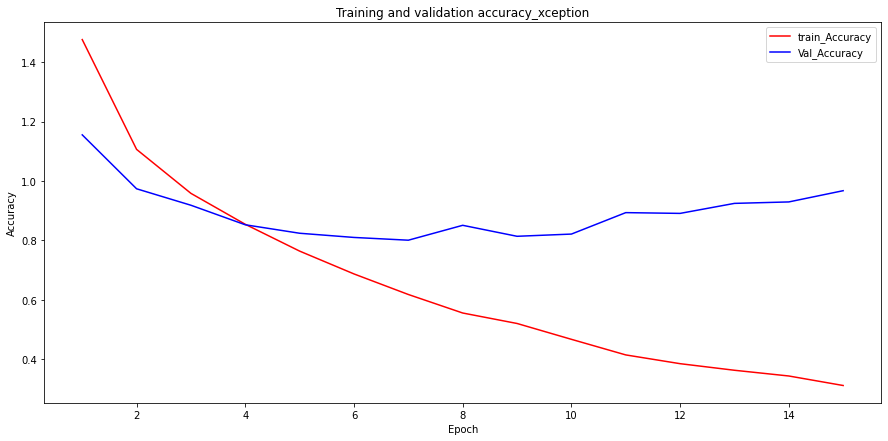

In [ ]:
epoch = np.arange(1,16)
plt.figure(figsize=(15,7))
plt.plot(epoch , xception_loss, 'r' ,  label = 'train_Accuracy')
plt.plot(epoch , xception_val_loss, 'b' , label = 'Val_Accuracy')
plt.title('Training and validation accuracy_xception')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.yticks(np.arange(0.6 , 1) )
plt.legend();

In [3]:
loss = [1.4761
,1.1061
,0.9580
,0.8538
,0.7635
,0.6866
,0.6174
,0.5550
,0.5198
,0.4664
,0.4139
,0.3844
,0.3622
,0.3429
,0.3108]
val_loss = [1.1551
,0.9735
,0.9180
,0.8522
,0.8237
,0.8096
,0.8003
,0.8505
,0.8135
,0.8209
,0.8932
,0.8906
,0.9243
,0.9292
,0.9670]

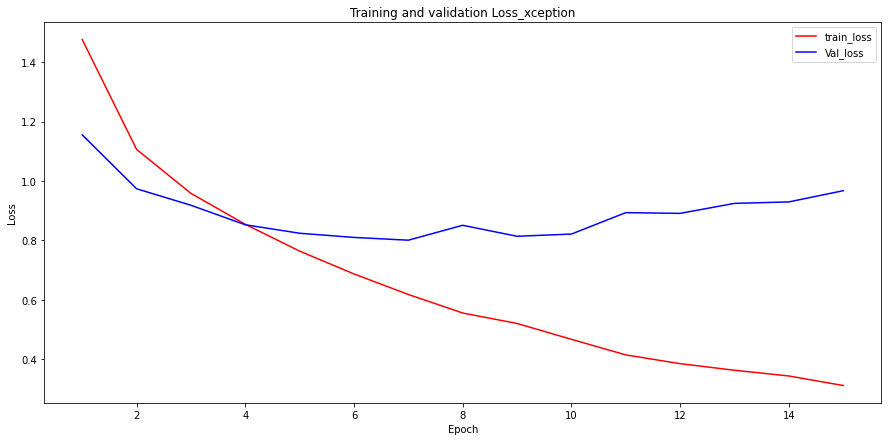

In [6]:
epoch = np.arange(1,16)
plt.figure(figsize=(15,7))
plt.plot(epoch ,loss, 'r' ,  label = 'train_loss')
plt.plot(epoch , val_loss, 'b' , label = 'Val_loss')
plt.title('Training and validation Loss_xception')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.yticks(np.arange(0.6 , 1) )
plt.legend();

In [ ]:
xception_model.save('/content/drive/MyDrive/ieee-final-round/xception.h5')

In [ ]:
xception_model.save('/content/drive/MyDrive/ieee-final-round/xception_drop1.h5') #1.55 val loss


In [ ]:
xception_model.save('/content/drive/MyDrive/ieee-final-round/xception_drop2.h5') #val_loss: 1.0550

In [ ]:
xception_model.save('/content/drive/MyDrive/ieee-final-round/xception_drop3.h5') #loss: 0.3108 - acc: 0.8957 - val_loss: 0.9670 - val_acc: 0.7324

In [ ]:
cleaned_path = '/content/drive/MyDrive/ieee-final-round/test_filtered'

In [ ]:
images_name_filtered = sorted(os.listdir(cleaned_path))

In [ ]:
images_name_filtered[:5]

['ZJ000003.jpg',
 'ZJ000005.jpg',
 'ZJ000011.jpg',
 'ZJ000012.jpg',
 'ZJ000017.jpg']

In [ ]:
for i in range (len(images_name_filtered)):
  images_name_filtered[i] = images_name_filtered[i].replace('.jpg','')

In [ ]:
images_name_filtered[:5]

['ZJ000003', 'ZJ000005', 'ZJ000011', 'ZJ000012', 'ZJ000017']

In [ ]:
images_name_filtered[0:10]

In [ ]:
len(images_name_filtered)

3759

In [ ]:
def test_normalize(image):
    image = image/255.
    return image

In [ ]:
test_directory = '/content/drive/MyDrive/ieee-final-round/test_filtered'

In [ ]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory= test_directory,
    labels=None,
    label_mode=None,
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(200,200), # change this to 256
    shuffle=False,
    seed=42,
    interpolation='bilinear',
    follow_links=False,
)

Found 3759 files belonging to 1 classes.


In [ ]:
test_data = test_data.map(test_normalize)

In [ ]:
results = xception_model.predict(test_data)

In [ ]:
sub1 = pd.DataFrame(results,columns = ['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard','monkey_prosimian', 'rodent'])

In [ ]:
sub1

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,0.000281,0.000006,2.513027e-08,1.494211e-08,6.847342e-07,8.445220e-08,0.999694,1.865579e-05
1,0.021415,0.008170,1.007604e-02,4.954339e-01,6.509748e-02,1.341968e-01,0.250441,1.516982e-02
2,0.060783,0.016243,1.579342e-04,8.930273e-01,1.763158e-03,1.152730e-03,0.021013,5.859509e-03
3,0.402328,0.060255,1.091873e-03,7.686359e-03,3.259976e-03,1.622729e-03,0.336982,1.867731e-01
4,0.228276,0.047384,5.331721e-01,2.301753e-02,1.472246e-03,4.247099e-03,0.052621,1.098099e-01
...,...,...,...,...,...,...,...,...
3754,0.205080,0.001159,1.310538e-04,7.053804e-04,9.009678e-05,2.507812e-03,0.788593,1.732334e-03
3755,0.000043,0.000039,3.836478e-03,1.034566e-07,7.490856e-02,9.204409e-01,0.000731,2.397015e-07
3756,0.530770,0.032280,7.162402e-05,4.033572e-01,1.086665e-04,7.992397e-04,0.000921,3.169196e-02
3757,0.001346,0.000016,1.225563e-07,9.982678e-01,6.237293e-06,1.219656e-05,0.000016,3.352917e-04


In [ ]:
sub1['id'] = images_name_filtered

In [ ]:
df = sub1[['id','antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard','monkey_prosimian', 'rodent']]

In [ ]:
df

,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,ZJ000003,0.000281,0.000006,2.513027e-08,1.494211e-08,6.847342e-07,8.445220e-08,0.999694,1.865579e-05
1,ZJ000005,0.021415,0.008170,1.007604e-02,4.954339e-01,6.509748e-02,1.341968e-01,0.250441,1.516982e-02
2,ZJ000011,0.060783,0.016243,1.579342e-04,8.930273e-01,1.763158e-03,1.152730e-03,0.021013,5.859509e-03
3,ZJ000012,0.402328,0.060255,1.091873e-03,7.686359e-03,3.259976e-03,1.622729e-03,0.336982,1.867731e-01
4,ZJ000017,0.228276,0.047384,5.331721e-01,2.301753e-02,1.472246e-03,4.247099e-03,0.052621,1.098099e-01
...,...,...,...,...,...,...,...,...,...
3754,ZJ016470,0.205080,0.001159,1.310538e-04,7.053804e-04,9.009678e-05,2.507812e-03,0.788593,1.732334e-03
3755,ZJ016475,0.000043,0.000039,3.836478e-03,1.034566e-07,7.490856e-02,9.204409e-01,0.000731,2.397015e-07
3756,ZJ016476,0.530770,0.032280,7.162402e-05,4.033572e-01,1.086665e-04,7.992397e-04,0.000921,3.169196e-02
3757,ZJ016477,0.001346,0.000016,1.225563e-07,9.982678e-01,6.237293e-06,1.219656e-05,0.000016,3.352917e-04


In [ ]:
df.to_csv('/content/drive/MyDrive/ieee-final-round/xception.csv' , index = False)